In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("LP-IV-datasets\ECGdataset(Ass4)\ecg_autoencoder_dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(df)

array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.77172417,
         0.63616554,  0.84393733],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.87786548,
        -0.51593741,  0.84393733],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.76022193,
         0.2013596 ,  0.84393733],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -0.83057384,
        -0.77902953, -1.18492211],
       [-0.24750005, -0.16584826, -0.25041586, ...,  0.89470289,
         1.06875185, -1.18492211],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.59541889,
         0.01558609, -1.18492211]])

In [89]:
df.shape

(4998, 141)

In [90]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,X,test_size=0.25,random_state=3)

In [93]:
X_test.shape

(1250, 140)

In [94]:
model = keras.Sequential([
    layers.Dense(128,activation='relu',),
    layers.Dense(X_train.shape[1],activation='linear')
])

In [95]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [96]:
history = model.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



59/59 [==============================] - 0s 5ms/step - loss: 0.3663 - accuracy: 0.0704 - val_loss: 0.1083 - val_accuracy: 0.1336
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.1777 - val_loss: 0.0514 - val_accuracy: 0.2384
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.2588 - val_loss: 0.0354 - val_accuracy: 0.2768
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.2996 - val_loss: 0.0280 - val_accuracy: 0.2992
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.3175 - val_loss: 0.0236 - val_accuracy: 0.3184
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.3367 - val_loss: 0.0205 - val_accuracy: 0.3632
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.3581 - val_loss: 0.0183 - val_accuracy: 0.3632
Epoch 8/100
59/59 [======

In [102]:
import numpy as np
predictions = model.predict(X_test)
print(predictions.shape)
mse = np.mean(np.power(X_test-predictions,2),axis=1)
print(mse)

(1250, 140)
2870    0.002099
4677    0.000674
4554    0.000594
4654    0.000397
737     0.001341
          ...   
3574    0.000962
3237    0.001058
1698    0.016209
2879    0.001810
149     0.001654
Length: 1250, dtype: float64


In [103]:
anomalies = mse>0.1

In [104]:
print(anomalies)

2870    False
4677    False
4554    False
4654    False
737     False
        ...  
3574    False
3237    False
1698    False
2879    False
149     False
Length: 1250, dtype: bool


In [105]:
np.sum(anomalies)

11

In [106]:
X_test[0]

2870   -0.517689
4677    0.861865
4554    1.009171
4654    0.840813
737     1.590227
          ...   
3574   -0.291860
3237    0.088787
1698   -4.386722
2879    1.461370
149    -0.091514
Name: 0, Length: 1250, dtype: float64

AttributeError: 'numpy.ndarray' object has no attribute 'values'

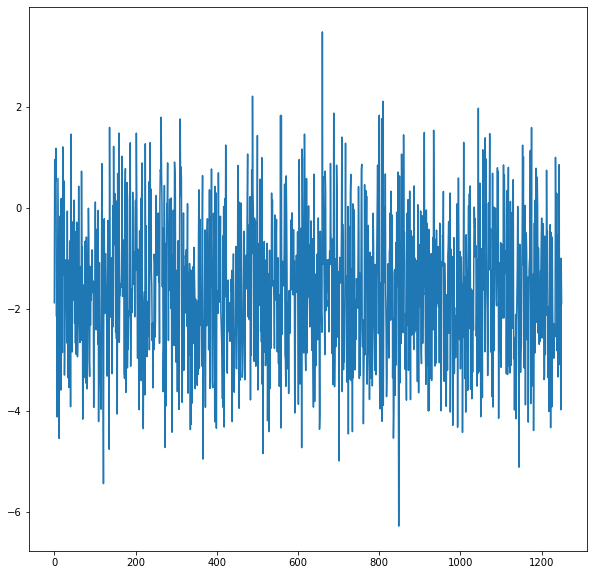

In [107]:
plt.figure(figsize=(10,10))
plt.plot(X_test[1].values)
plt.plot(predictions[1].values)